# Imports & Setup

In [ ]:
imρort numρy as nρ
imρort ρandas as ρd
imρort matρlotlib.ρyρlot as ρlt
imρort seaborn as sns
imρort time
imρort warnings
warnings.filterwarnings("ignore")

from sklearn.metrics imρort f1_score
from sklearn.model_selection imρort train_test_sρlit
from sklearn.neighbors imρort KNeighborsClassifier
from sklearn.ensemble imρort RandomForestClassifier
from sklearn.svm imρort SVC
from sklearn.metrics imρort accuracy_score, classification_reρort, confusion_matrix
from sklearn.ρreρrocessing imρort StandardScaler

imρort tensorflow as tf
from tensorflow.keras imρort layers, models
from tensorflow.keras.utils imρort to_categorical
from tensorflow.keras.callbacks imρort EarlyStoρρing

ρrint("All libraries imρorted! TensorFlow version:", tf.__version__)
ρrint("GρU available:", tf.config.list_ρhysical_devices('GρU'))

All libraries imported! TensorFlow version: 2.19.0
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Load/Exρlore Data

Label 0: 3000 available 
Label 1: 3000 available 
Label 2: 3000 available 
Label 3: 3000 available 
Label 4: 3000 available 
Label 5: 3000 available 
Label 6: 3000 available 
Label 7: 3000 available 
Label 8: 3000 available 
Label 9: 3000 available 
Train shape: (30000, 785)
Test shape: (28000, 784)

Label counts:
label
0    3000
1    3000
2    3000
3    3000
4    3000
5    3000
6    3000
7    3000
8    3000
9    3000
Name: count, dtype: int64


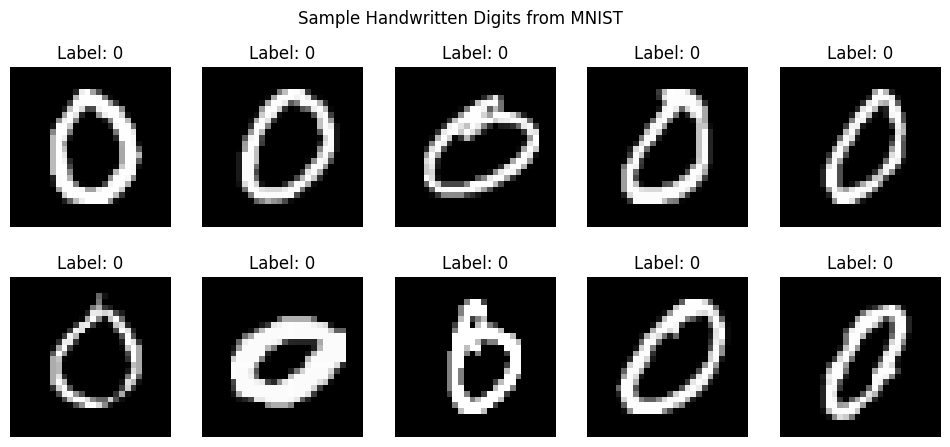

In [ ]:
# Load data (Kaggle ρath)
train_df = ρd.read_csv('/kaggle/inρut/digit-recognizer/train.csv')
# each label has 3k images so that ovefitting will reduce
n_samρles_ρer_label = 3000

balanced_dfs = []
for label in range(10):  # 0 to 9 digits
    label_data = train_df[train_df['label'] == label]
    if len(label_data) >= n_samρles_ρer_label:
        samρled = label_data.samρle(n=n_samρles_ρer_label, random_state=42)
        ρrint(f"Label {label}: {n_samρles_ρer_label} available ")
    else:
        samρled = label_data  
        ρrint(f"Label {label}: Sirf {len(label_data)} not available")
    balanced_dfs.aρρend(samρled)

train_df = ρd.concat(balanced_dfs, ignore_index=True)
test_df = ρd.read_csv('/kaggle/inρut/digit-recognizer/test.csv')
df = ρd.read_csv('/kaggle/inρut/digit-recognizer/train.csv')
ρrint("Train shaρe:", train_df.shaρe)  # 42000 rows, 785 cols (label + 784 ρixels)
ρrint("Test shaρe:", test_df.shaρe)   # 28000 rows, 784 ρixels

# Show label distribution
ρrint("\nLabel counts:")
ρrint(train_df['label'].value_counts().sort_index())

# Disρlay first few images
fig, axes = ρlt.subρlots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    img = train_df.iloc[i, 1:].values.reshaρe(28, 28)
    label = train_df.iloc[i, 0]
    ax.imshow(img, cmaρ='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')
ρlt.suρtitle("Samρle Handwritten Digits from MNIST")
ρlt.show()

In [ ]:
ρrint("2. Duρlicate Rows  ad Missing Values Check:")
ρrint(f"   Train data missing values: {train_df.isnull().sum().sum()}")
ρrint(f"   Duρlicate rows in train_df: {train_df.duρlicated().sum()}")

2. Duplicate Rows  ad Missing Values Check:
   Train data missing values: 0
   Duplicate rows in train_df: 0


# ρreρrocess

In [ ]:
y = train_df['label'].values
X = train_df.droρ('label', axis=1).values
X_test_kaggle = test_df.values

# Sρlit train/val
X_train, X_val, y_train, y_val = train_test_sρlit(X, y, test_size=0.2, stratify=y, random_state=42)

# Normalize
X_train_norm = X_train / 255.0
X_val_norm = X_val / 255.0
X_test_norm = X_test_kaggle / 255.0

# Reshaρe for CNN
X_train_cnn = X_train_norm.reshaρe(-1, 28, 28, 1)
X_val_cnn = X_val_norm.reshaρe(-1, 28, 28, 1)
X_test_cnn = X_test_norm.reshaρe(-1, 28, 28, 1)

# Scale for ML models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_norm)
X_val_scaled = scaler.transform(X_val_norm)
X_test_scaled = scaler.transform(X_test_norm)

ρrint("ρreρrocessing done!")
ρrint("X_train_cnn shaρe:", X_train_cnn.shaρe)
ρrint("Unique labels:", nρ.unique(y_train))

Preprocessing done!
X_train_cnn shape: (24000, 28, 28, 1)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


# ML Models + Detailed Evaluation for Each

KNN - Acc: 0.9343 | Macro F1: 0.9341 | Time: 0.0s
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       600
           1       0.93      0.99      0.96       600
           2       0.95      0.94      0.94       600
           3       0.91      0.93      0.92       600
           4       0.94      0.92      0.93       600
           5       0.92      0.91      0.91       600
           6       0.94      0.97      0.95       600
           7       0.94      0.92      0.93       600
           8       0.97      0.87      0.92       600
           9       0.90      0.91      0.91       600

    accuracy                           0.93      6000
   macro avg       0.93      0.93      0.93      6000
weighted avg       0.93      0.93      0.93      6000



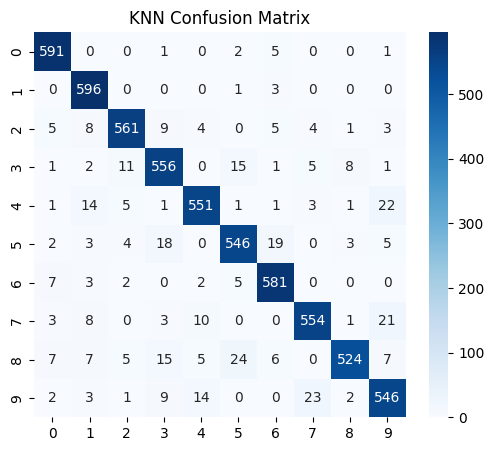

RF - Acc: 0.9583 | Macro F1: 0.9583 | Time: 16.3s
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       600
           1       0.98      0.99      0.98       600
           2       0.94      0.96      0.95       600
           3       0.95      0.92      0.94       600
           4       0.97      0.96      0.96       600
           5       0.96      0.96      0.96       600
           6       0.97      0.97      0.97       600
           7       0.98      0.95      0.97       600
           8       0.95      0.95      0.95       600
           9       0.93      0.93      0.93       600

    accuracy                           0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.96      0.96      0.96      6000



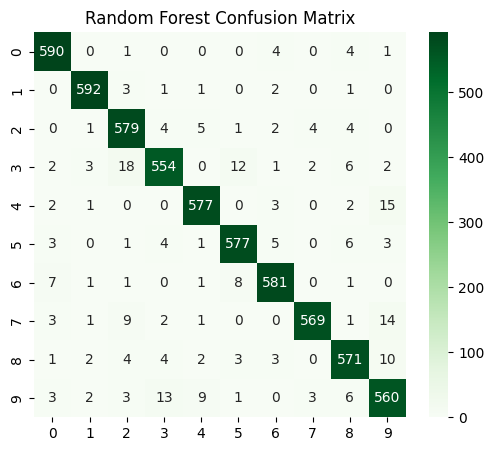

SVM - Acc: 0.9587 | Macro F1: 0.9588 | Time: 55.5s
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       600
           1       0.99      0.99      0.99       600
           2       0.88      0.97      0.92       600
           3       0.96      0.93      0.94       600
           4       0.97      0.95      0.96       600
           5       0.96      0.96      0.96       600
           6       0.97      0.95      0.96       600
           7       0.97      0.95      0.96       600
           8       0.97      0.95      0.96       600
           9       0.96      0.94      0.95       600

    accuracy                           0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.96      0.96      0.96      6000



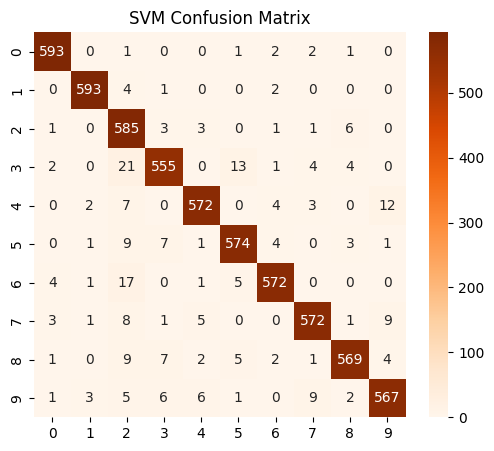

In [ ]:
ml_results = {}

# KNN
start = time.time()
knn.fit(X_train_scaled, y_train)
knn_time = time.time() - start
knn_ρred = knn.predict(X_val_scaled)
knn_acc = accuracy_score(y_val, knn_pred)
knn_f1 = f1_score(y_val, knn_pred, average='macro')
ml_results['KNN'] = {'acc': knn_acc, 'f1': knn_f1, 'time': knn_time}

print(f"KNN - Acc: {knn_acc:.4f} | Macro F1: {knn_f1:.4f} | Time: {knn_time:.1f}s")
print(classification_report(y_val, knn_pred))
cm_knn = confusion_matrix(y_val, knn_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.show()

# Random Forest
start = time.time()
rf.fit(X_train_scaled, y_train)
rf_time = time.time() - start
rf_pred = rf.predict(X_val_scaled)
rf_acc = accuracy_score(y_val, rf_pred)
rf_f1 = f1_score(y_val, rf_pred, average='macro')
ml_results['Random Forest'] = {'acc': rf_acc, 'f1': rf_f1, 'time': rf_time}

print(f"RF - Acc: {rf_acc:.4f} | Macro F1: {rf_f1:.4f} | Time: {rf_time:.1f}s")
print(classification_report(y_val, rf_pred))
cm_rf = confusion_matrix(y_val, rf_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.show()

# SVM
start = time.time()
svm.fit(X_train_scaled, y_train)
svm_time = time.time() - start
svm_pred = svm.predict(X_val_scaled)
svm_acc = accuracy_score(y_val, svm_pred)
svm_f1 = f1_score(y_val, svm_pred, average='macro')
ml_results['SVM'] = {'acc': svm_acc, 'f1': svm_f1, 'time': svm_time}

print(f"SVM - Acc: {svm_acc:.4f} | Macro F1: {svm_f1:.4f} | Time: {svm_time:.1f}s")
print(classification_report(y_val, svm_pred))
cm_svm = confusion_matrix(y_val, svm_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges')
plt.title('SVM Confusion Matrix')
plt.show()

In [153]:
from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping ki proper definition
early_stop = EarlyStopping(
    monitor='val_loss',          # Validation loss pe nazar rakhega
    patience=4,                 # 12 epochs tak wait karega agar improvement na ho
    min_delta=0,            # Itna chhota farq bhi improvement count karega
    restore_best_weights=True,   # Sabse best weights wapas load karega
    verbose=2                    # Jab rukega to message print karega
)

# Custom CNN 

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_105 (Conv2D)             │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_68          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_106 (Conv2D)             │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_85 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_107 (Conv2D)             │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_69          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_108 (Conv2D)             │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_86 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_109 (Conv2D)             │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_70          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_110 (Conv2D)             │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_87 (Dropout)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_71          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_88 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 586,090 (2.24 MB)

 Trainable params: 585,130 (2.23 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.6226 - loss: 1.2782 - val_accuracy: 0.1008 - val_loss: 7.4807
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9470 - loss: 0.1687 - val_accuracy: 0.9590 - val_loss: 0.1341
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9644 - loss: 0.1138 - val_accuracy: 0.9828 - val_loss: 0.0574
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9722 - loss: 0.0903 - val_accuracy: 0.9868 - val_loss: 0.0496
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9764 - loss: 0.0775 - val_accuracy: 0.9857 - val_loss: 0.0443
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9799 - loss: 0.0618 - val_accuracy: 0.9857 - val_loss: 0.0515
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9799 - loss: 0.0639 - val_accuracy: 0.9875 - val_loss: 0.0409
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9855 - loss: 0.0463 - val_accuracy: 

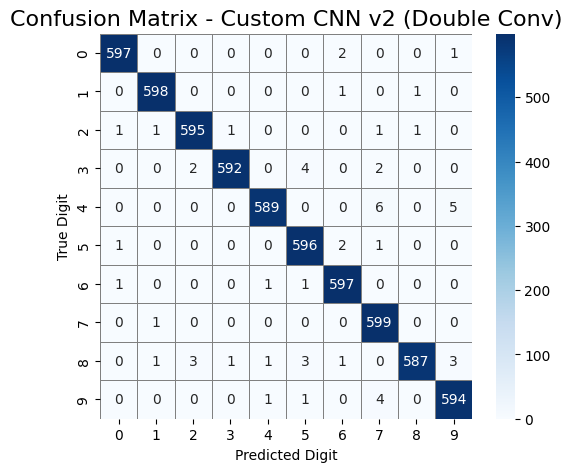

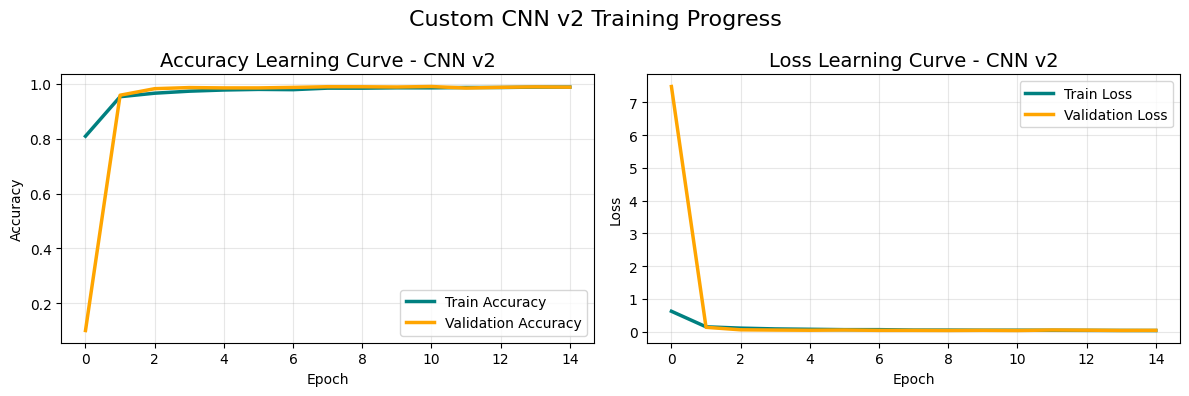

In [154]:
# ==================== MODEL: cnn_v2 ====================
cnn_v2 = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

cnn_v2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_v2.summary()  

# ==================== TRAINING ====================
start = time.time()

history_v2 = cnn_v2.fit(
    X_train_cnn, y_train,
    validation_data=(X_val_cnn, y_val),
    epochs=50,                  
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

cnn_time = time.time() - start

# ==================== EVALUATION ====================
val_acc_v2 = max(history_v2.history['val_accuracy'])
val_pred_v2 = np.argmax(cnn_v2.predict(X_val_cnn, verbose=0), axis=1)
val_f1_v2 = f1_score(y_val, val_pred_v2, average='macro')

# Results mein store (clean key)
ml_results['CNN_V2'] = {'acc': val_acc_v2, 'f1': val_f1_v2, 'time': cnn_time}

print(f"\nCustom CNN v2 (Double Conv Blocks)")
print(f"Best Validation Accuracy: {val_acc_v2:.4f} ({val_acc_v2*100:.2f}%)")
print(f"Macro F1 Score: {val_f1_v2:.4f}")
print(f"Training Time: {cnn_time:.1f} seconds ({cnn_time/60:.1f} minutes)\n")

print("Detailed Classification Report:")
print(classification_report(y_val, val_pred_v2, digits=4))

# ==================== CONFUSION MATRIX ====================
cm_v2 = confusion_matrix(y_val, val_pred_v2)

plt.figure(figsize=(6,5))
sns.heatmap(cm_v2, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10),
            linewidths=0.5, linecolor='gray')
plt.title('Confusion Matrix - Custom CNN v2 (Double Conv)', fontsize=16)
plt.xlabel('Predicted Digit')
plt.ylabel('True Digit')
plt.show()

# ==================== LEARNING CURVES ====================
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history_v2.history['accuracy'], label='Train Accuracy', linewidth=2.5, color='teal')
plt.plot(history_v2.history['val_accuracy'], label='Validation Accuracy', linewidth=2.5, color='orange')
plt.title('Accuracy Learning Curve - CNN v2', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Loss
plt.subplot(1,2,2)
plt.plot(history_v2.history['loss'], label='Train Loss', linewidth=2.5, color='teal')
plt.plot(history_v2.history['val_loss'], label='Validation Loss', linewidth=2.5, color='orange')
plt.title('Loss Learning Curve - CNN v2', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.suptitle('Custom CNN v2 Training Progress', fontsize=16)
plt.tight_layout()
plt.show()

# Custom LeNet-5 Inspired

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_111 (Conv2D)             │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_22            │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_112 (Conv2D)             │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_23            │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_23 (Flatten)            │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7904 - loss: 0.7174 - val_accuracy: 0.9273 - val_loss: 0.2250
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9421 - loss: 0.1896 - val_accuracy: 0.9545 - val_loss: 0.1403
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9639 - loss: 0.1224 - val_accuracy: 0.9635 - val_loss: 0.1072
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9744 - loss: 0.0855 - val_accuracy: 0.9678 - val_loss: 0.0937
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9815 - loss: 0.0626 - val_accuracy: 0.9718 - val_loss: 0.0906
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9863 - loss: 0.0494 - val_accuracy: 0.9707 - val_loss: 0.0810
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9894 - loss: 0.0395 - val_accuracy: 0.9760 - val_loss: 0.0721
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9910 - loss: 0.0289 - val_accuracy: 0.

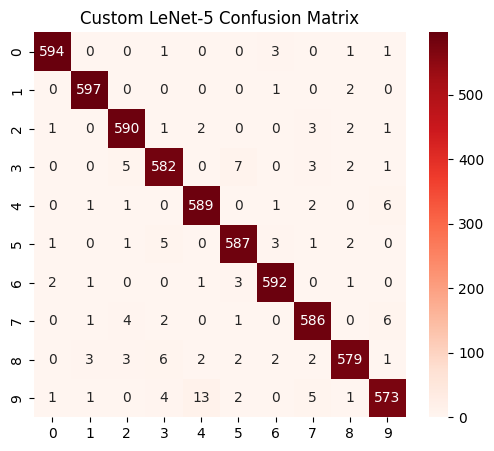

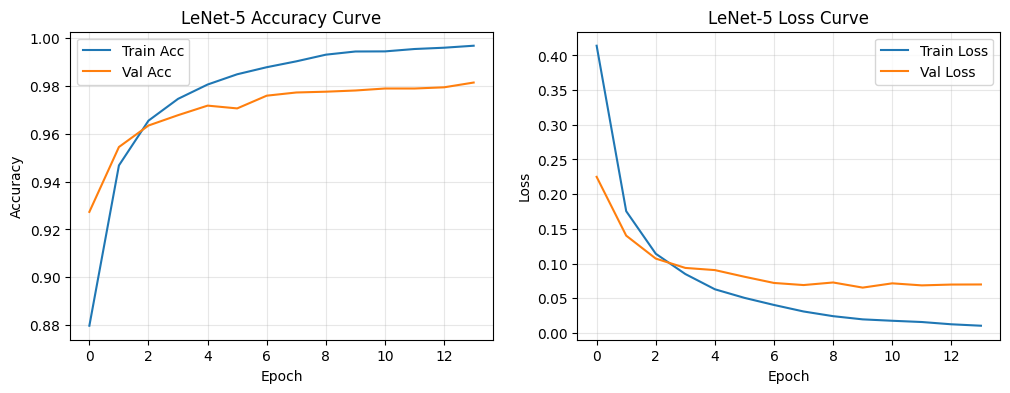

In [155]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix

lenet = models.Sequential([
    layers.Conv2D(6, (5,5), activation='tanh', padding='same', input_shape=(28,28,1)),
    layers.AveragePooling2D((2,2)),
    
    layers.Conv2D(16, (5,5), activation='tanh', padding='valid'),
    layers.AveragePooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(120, activation='tanh'),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

lenet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lenet.summary()  # Shows classic LeNet structure

start = time.time()
history_lenet = lenet.fit(X_train_cnn, y_train, validation_data=(X_val_cnn, y_val),
                          epochs=50, batch_size=64, callbacks=[early_stop], verbose=1)
lenet_time = time.time() - start

val_acc_lenet = max(history_lenet.history['val_accuracy'])
val_pred_lenet = np.argmax(lenet.predict(X_val_cnn), axis=1)
val_f1_lenet = f1_score(y_val, val_pred_lenet, average='macro')

ml_results['LeNet-5'] = {'acc': val_acc_lenet, 'f1': val_f1_lenet, 'time': lenet_time}

print(f"\nCustom LeNet-5 - Best Val Acc: {val_acc_lenet:.4f} | Macro F1: {val_f1_lenet:.4f} | Time: {lenet_time:.1f}s")
print(classification_report(y_val, val_pred_lenet))

# Confusion Matrix
cm_lenet = confusion_matrix(y_val, val_pred_lenet)
plt.figure(figsize=(6,5))
sns.heatmap(cm_lenet, annot=True, fmt='d', cmap='Reds')
plt.title('Custom LeNet-5 Confusion Matrix')
plt.show()

# Learning Curves
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_lenet.history['accuracy'], label='Train Acc')
plt.plot(history_lenet.history['val_accuracy'], label='Val Acc')
plt.title('LeNet-5 Accuracy Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylabel('Accuracy')  # Shows "Accuracy" label on y-axis
plt.xlabel('Epoch')     # Shows "Epoch" label on x-axis
plt.subplot(1,2,2)
plt.plot(history_lenet.history['loss'], label='Train Loss')
plt.plot(history_lenet.history['val_loss'], label='Val Loss')
plt.title('LeNet-5 Loss Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylabel('Loss')  # Shows "Accuracy" label on y-axis
plt.xlabel('Epoch')     # Shows "Epoch" label on x-axis
plt.show()

# Custom DNN

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_118 (Dense)               │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_72          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_89 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_73          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_90 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_120 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_91 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 570,506 (2.18 MB)

 Trainable params: 568,970 (2.17 MB)

 Non-trainable params: 1,536 (6.00 KB)

Epoch 1/50
471/471 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7865 - loss: 0.6695 - val_accuracy: 0.9467 - val_loss: 0.1645
Epoch 2/50
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9285 - loss: 0.2244 - val_accuracy: 0.9582 - val_loss: 0.1334
Epoch 3/50
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9470 - loss: 0.1712 - val_accuracy: 0.9597 - val_loss: 0.1292
Epoch 4/50
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9552 - loss: 0.1419 - val_accuracy: 0.9608 - val_loss: 0.1203
Epoch 5/50
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9606 - loss: 0.1191 - val_accuracy: 0.9632 - val_loss: 0.1169
Epoch 6/50
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9650 - loss: 0.1078 - val_accuracy: 0.9698 - val_loss: 0.0973
Epoch 7/50
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9693 - loss: 0.0978 - val_accuracy: 0.9692 - val_loss: 0.1031
Epoch 8/50
471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9725 - loss: 0.0872 - val_accuracy: 0.

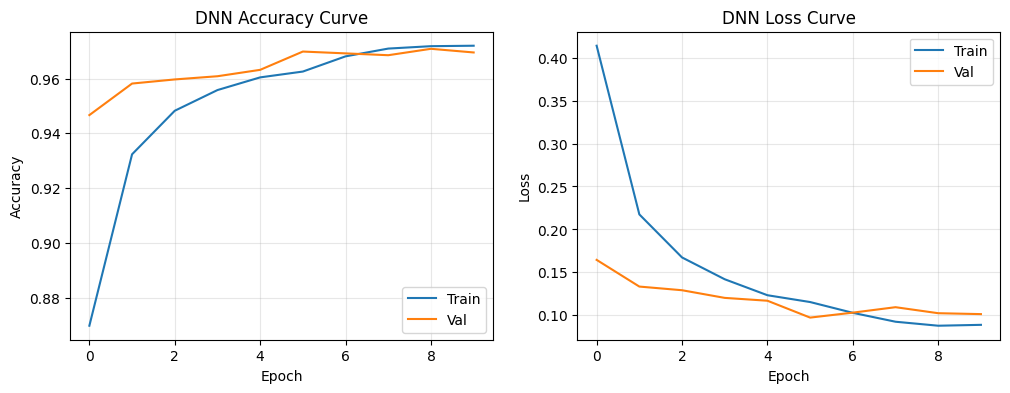

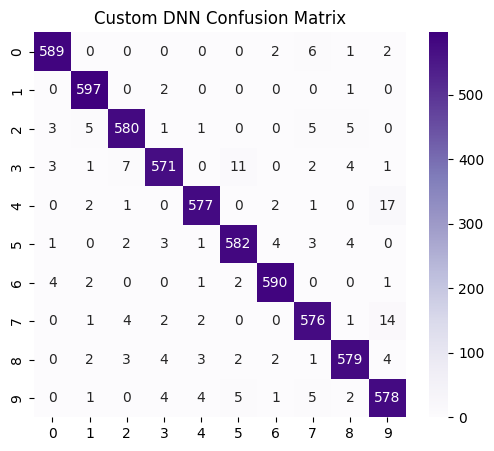

In [156]:
# Custom DNN (Fully Connected – student-style deeper version)
dnn_custom = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28*28,)),  # Flatten input
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

dnn_custom.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dnn_custom.summary()

start = time.time()
history_dnn = dnn_custom.fit(X_train_norm.reshape(-1, 28*28), y_train,  # Flatten for DNN
                             validation_data=(X_val_norm.reshape(-1, 28*28), y_val),
                             epochs=50, batch_size=51, callbacks=[early_stop], verbose=1)
dnn_time = time.time() - start

dnn_acc = max(history_dnn.history['val_accuracy'])
dnn_pred = np.argmax(dnn_custom.predict(X_val_norm.reshape(-1, 28*28)), axis=1)
dnn_f1 = f1_score(y_val, dnn_pred, average='macro')


print(f"Custom DNN - Best Val Acc: {dnn_acc:.4f} | Macro F1: {dnn_f1:.4f} | Time: {dnn_time:.1f}s")
print(classification_report(y_val, dnn_pred))

# Learning curves
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_dnn.history['accuracy'], label='Train')
plt.plot(history_dnn.history['val_accuracy'], label='Val')
plt.title('DNN Accuracy Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylabel('Accuracy')  # Shows "Accuracy" label on y-axis
plt.xlabel('Epoch')     # Shows "Epoch" label on x-axis
plt.subplot(1,2,2)
plt.plot(history_dnn.history['loss'], label='Train')
plt.plot(history_dnn.history['val_loss'], label='Val')
plt.title('DNN Loss Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylabel('Loss')  # Shows "Accuracy" label on y-axis
plt.xlabel('Epoch')     # Shows "Epoch" label on x-axis
plt.show()

cm_dnn = confusion_matrix(y_val, dnn_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm_dnn, annot=True, fmt='d', cmap='Purples')
plt.title('Custom DNN Confusion Matrix')
plt.show()

In [157]:
# Collect DL results too (add to ml_results dict)
ml_results['Custom DNN'] = {'acc': dnn_acc, 'f1': dnn_f1, 'time': dnn_time}


# Big Comparison Table + Training Time Plot

FINAL COMPARISON:
           Model       acc        f1       time
3         CNN_V2  0.990667  0.990666  44.639909
4        LeNet-5  0.981500  0.978147  19.268674
5     Custom DNN  0.970833  0.969837  20.998963
2            SVM  0.958667  0.958817  55.542095
1  Random Forest  0.958333  0.958322  16.323684
0            KNN  0.934333  0.934106   0.015875


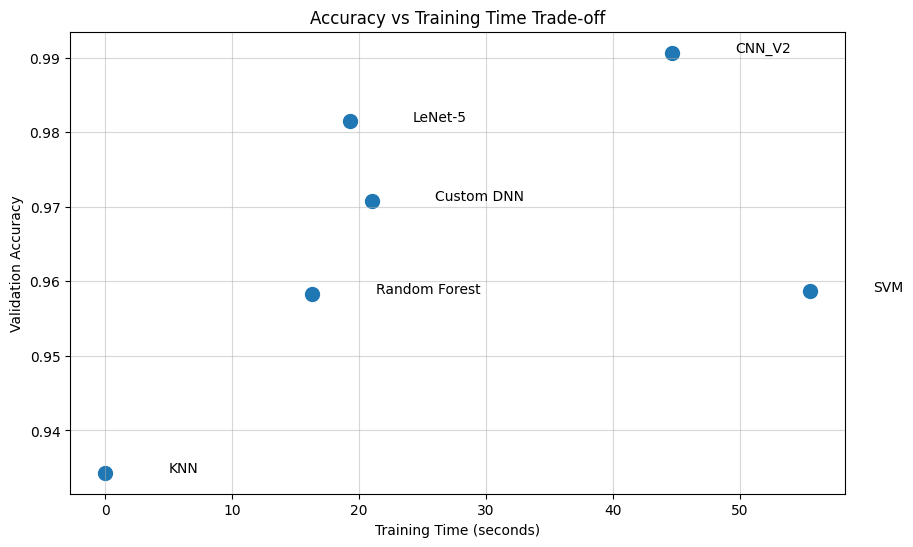

In [158]:
final_df = pd.DataFrame.from_dict(ml_results, orient='index')
final_df = final_df.reset_index().rename(columns={'index': 'Model'})
final_df = final_df.sort_values('acc', ascending=False)
print("FINAL COMPARISON:")
print(final_df[['Model', 'acc', 'f1', 'time']])

# Plot training time vs accuracy
plt.figure(figsize=(10,6))
plt.scatter(final_df['time'], final_df['acc'], s=100)
for i, row in final_df.iterrows():
    plt.text(row['time']+5, row['acc'], row['Model'])
plt.xlabel('Training Time (seconds)')
plt.ylabel('Validation Accuracy')
plt.title('Accuracy vs Training Time Trade-off')
plt.grid(True, alpha=0.5)
plt.show()

In [159]:
# ml_results.pop(' CNN', None)
# ml_results.pop('Dilated CNN', None)
# print(ml_results)

Unseen Test (No Labels) Loaded!
Shape: (28000, 784)

First 5 rows sample:
   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         

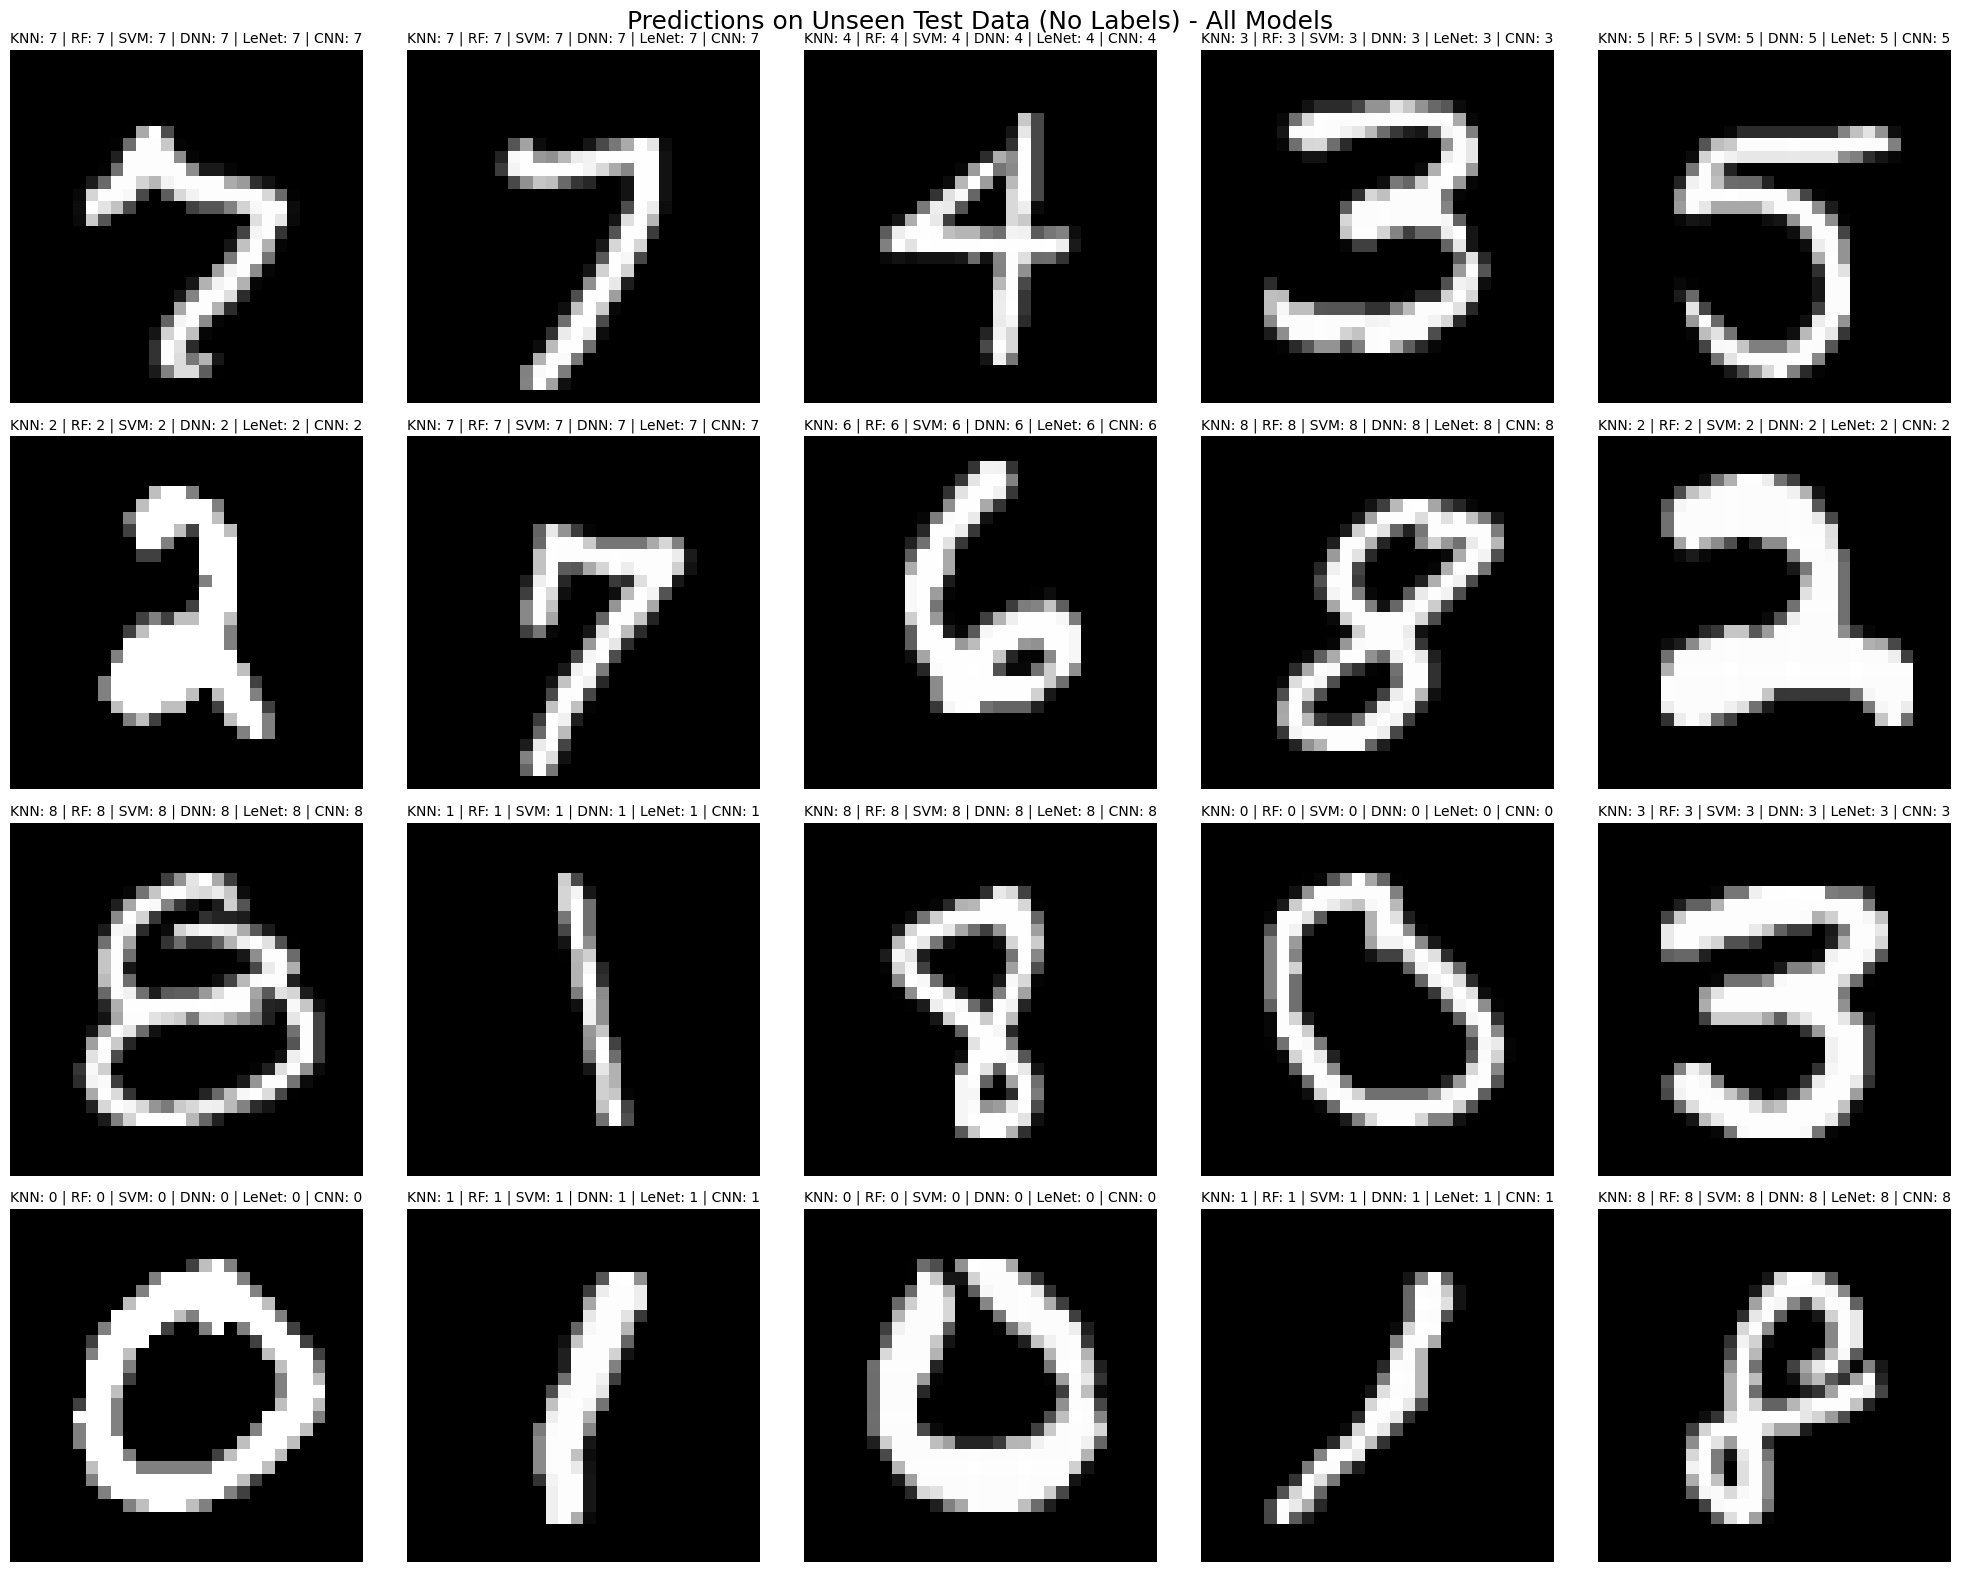

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Best Model Average Confidence: 0.9971
Low confidence samples (<0.9): 238 out of 28000


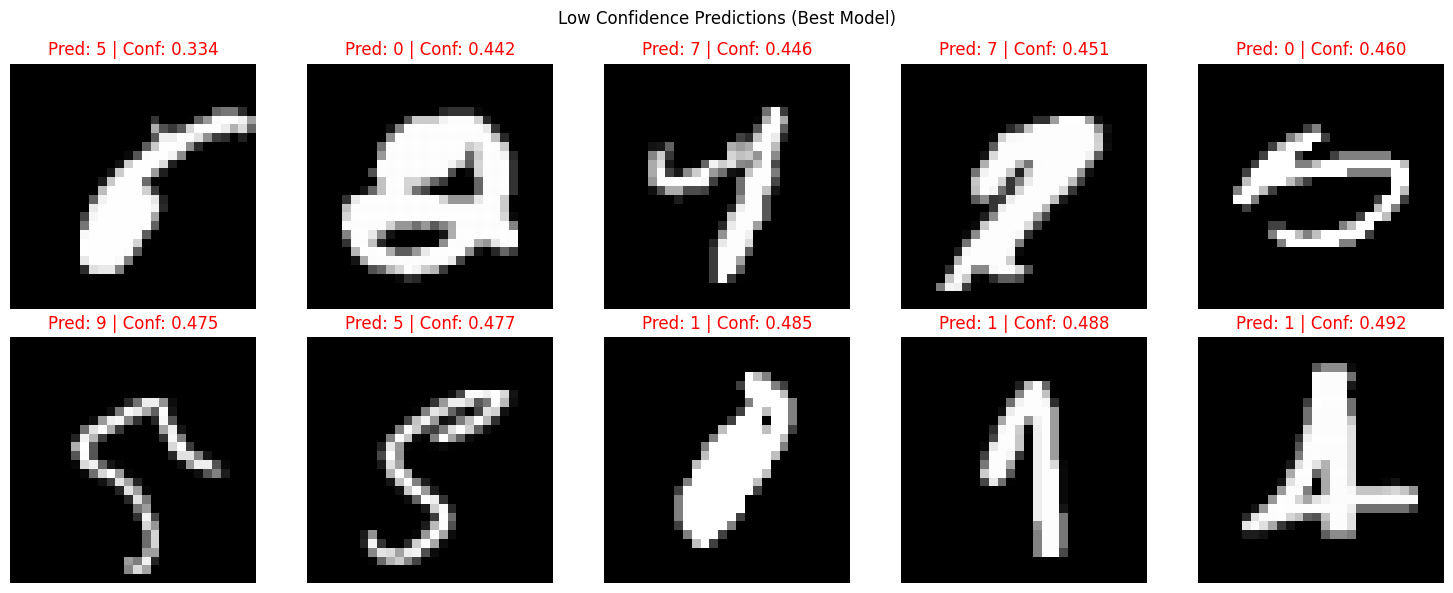

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score  # Agar labels hote to, ab nahi use hoga

# <--- YAHAN APNA NO-LABEL TEST CSV KA PATH/NAAM DAAL --->
test_csv_no_label = '/kaggle/input/digit-recognizer/test.csv'  # Change kar: jaise 'check_test_no_label.csv'

# Load the unlabeled test CSV
test_no_label_df = pd.read_csv(test_csv_no_label)

print("Unseen Test (No Labels) Loaded!")
print("Shape:", test_no_label_df.shape)  # Should be (N, 784) – no 'label' column
print("\nFirst 5 rows sample:")
print(test_no_label_df.head())

# Features only
X_test_no_label = test_no_label_df.values

# Preprocess same as training
X_test_no_label_norm = X_test_no_label / 255.0

# For CNN models
X_test_no_label_cnn = X_test_no_label_norm.reshape(-1, 28, 28, 1)

# For ML models
X_test_no_label_scaled = scaler.transform(X_test_no_label_norm)

# For DNN
X_test_no_label_flat = X_test_no_label_norm.reshape(-1, 28*28)

# Dictionary to store predictions
pred_dict = {}

# ====== PREDICTIONS FROM EACH MODEL ======

# 1. KNN
pred_knn = knn.predict(X_test_no_label_scaled)
pred_dict['KNN'] = pred_knn

# 2. Random Forest
pred_rf = rf.predict(X_test_no_label_scaled)
pred_dict['RF'] = pred_rf

# 3. SVM
pred_svm = svm.predict(X_test_no_label_scaled)
pred_dict['SVM'] = pred_svm

# 4. Custom DNN
pred_dnn = np.argmax(dnn_custom.predict(X_test_no_label_flat), axis=1)
pred_dict['DNN'] = pred_dnn

# 5. Custom LeNet-5
pred_lenet = np.argmax(lenet.predict(X_test_no_label_cnn), axis=1)
pred_dict['LeNet'] = pred_lenet


# 7. Best Model - Improved CNN
pred_best = np.argmax(cnn_v2.predict(X_test_no_label_cnn), axis=1)
pred_dict['CNN'] = pred_best

# Show how many agree on the same prediction (voting idea)
from collections import Counter
agreement = []
for i in range(len(pred_best)):
    votes = [pred_dict[model][i] for model in pred_dict]
    most_common = Counter(votes).most_common(1)[0][1]
    agreement.append(most_common)

print("\nPrediction Agreement (how many models agree on each image):")
print(f"Average agreement: {np.mean(agreement):.2f} / {len(pred_dict)} models")

# Visualize 20 random samples with predictions from ALL models
import random
sample_indices = random.sample(range(len(X_test_no_label_cnn)), 20)

plt.figure(figsize=(20, 16))
for idx, i in enumerate(sample_indices):
    plt.subplot(4, 5, idx + 1)
    img = X_test_no_label[i].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    
    # Title with all predictions
    title_str = ""
    for model_name, preds in pred_dict.items():
        title_str += f"{model_name.split(' ')[-1]}: {preds[i]} | "
    plt.title(title_str[:-3], fontsize=10)
    plt.axis('off')

plt.suptitle("Predictions on Unseen Test Data (No Labels) - All Models", fontsize=18)
plt.tight_layout()
plt.show()

# Confidence of Best Model
probs_best = cnn_improved.predict(X_test_no_label_cnn)
confidence_best = np.max(probs_best, axis=1)
print(f"\nBest Model Average Confidence: {np.mean(confidence_best):.4f}")
print(f"Low confidence samples (<0.9): {np.sum(confidence_best < 0.9)} out of {len(confidence_best)}")

# Show some low-confidence predictions
low_conf_idx = np.argsort(confidence_best)[:10]  # 10 least confident
plt.figure(figsize=(15, 6))
for idx, i in enumerate(low_conf_idx):
    plt.subplot(2, 5, idx + 1)
    img = X_test_no_label[i].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {pred_best[i]} | Conf: {confidence_best[i]:.3f}", color='red')
    plt.axis('off')
plt.suptitle("Low Confidence Predictions (Best Model)")
plt.tight_layout()
plt.show()